<a href="https://colab.research.google.com/github/surapitttha/Python-upskill/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('ticks')

##iris Dataset

In [8]:
df =sns.load_dataset('iris')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
134,6.1,2.6,5.6,1.4,virginica
60,5.0,2.0,3.5,1.0,versicolor


In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [14]:
# Frequency of Species (target or class)
(label, count) = np.unique(df.species , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 50]
 ['versicolor' 50]
 ['virginica' 50]]


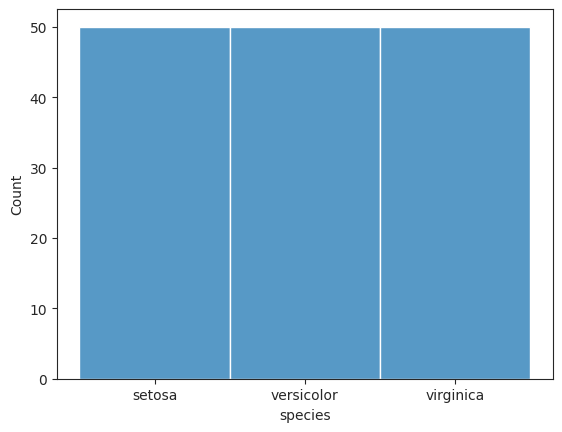

In [16]:
sns.histplot(data=df, x='species')
plt.show()

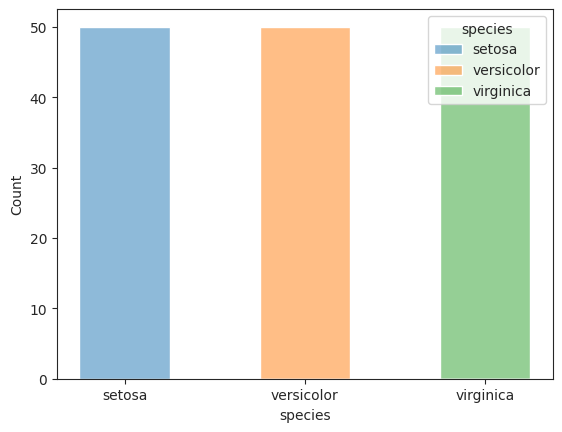

In [17]:
sns.histplot(data=df, x='species', hue='species', shrink=.5)
plt.show()

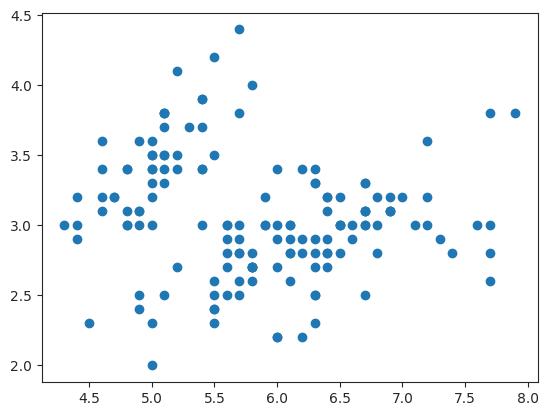

In [18]:
# Scatter plot by Matplotlib
plt.scatter(df.sepal_length, df.sepal_width)
plt.show()

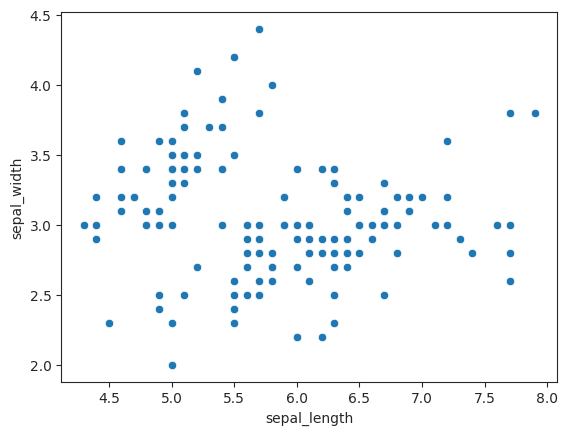

In [19]:
# Seaborn
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

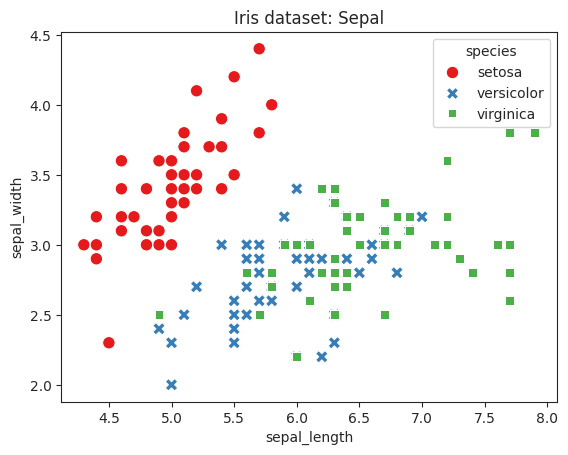

In [20]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                 hue='species',
                 style='species', palette='Set1',
                 s=80)
plt.title('Iris dataset: Sepal')
plt.show()

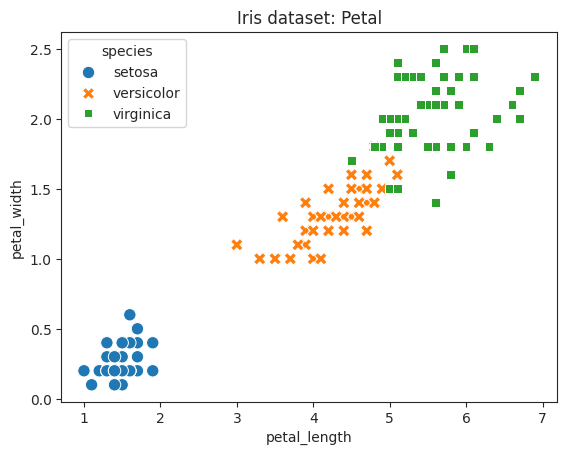

In [21]:
sns.scatterplot(data=df, x='petal_length', y='petal_width',
                 hue='species', style='species', s=80)
plt.title('Iris dataset: Petal')
plt.show()

## KDE
A kernel density estimate (KDE) plot (for visualizing the distribution of observations in a dataset)

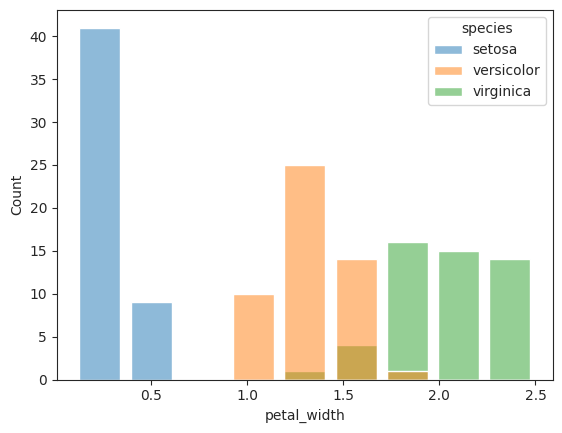

In [22]:
sns.histplot(data=df, x='petal_width', hue='species', shrink=.8)
plt.show()

<ipython-input-23-6aed40083bf6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='petal_width', hue='species', shade=True)


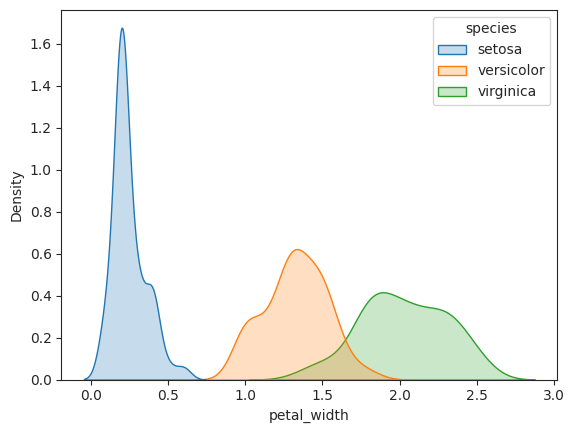

In [23]:
sns.kdeplot(data=df, x='petal_width', hue='species', shade=True)
plt.show()

<ipython-input-24-d1f7b479c2ed>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='sepal_width', hue='species', shade=True)


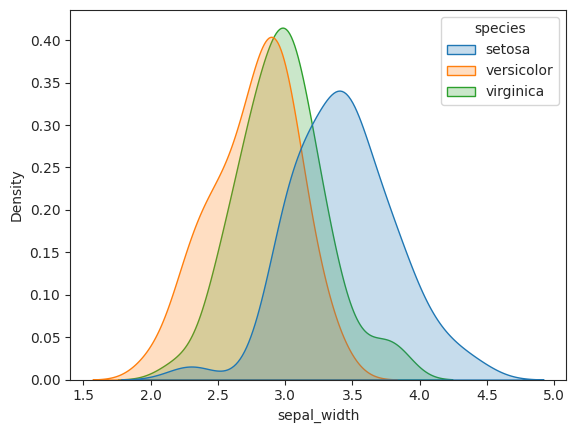

In [24]:
sns.kdeplot(data=df, x='sepal_width', hue='species', shade=True)
plt.show()

## Pairplot

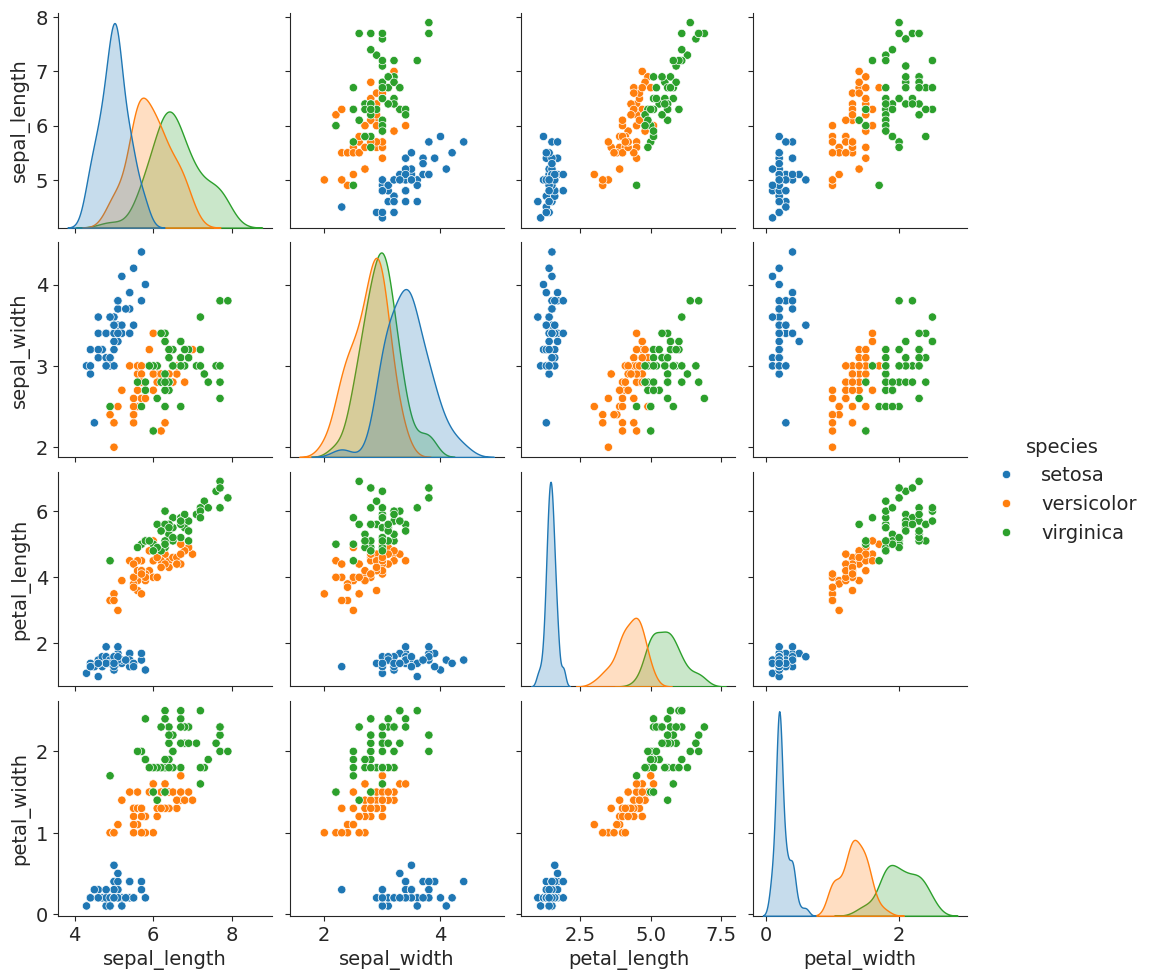

In [25]:
plt.rcParams.update({'font.size':14})
# sns.pairplot(df)
sns.pairplot(df, hue='species')
plt.show()

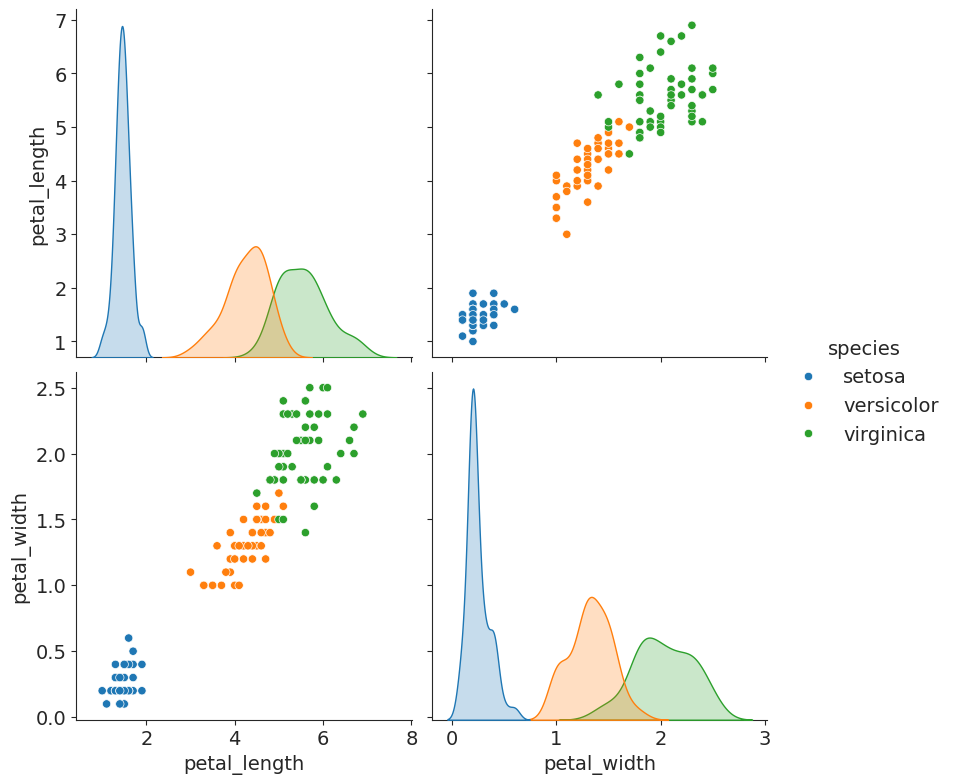

In [26]:
columns = ['petal_length', 'petal_width', 'species']
sns.pairplot(df[columns], hue='species', height=4)
plt.show()

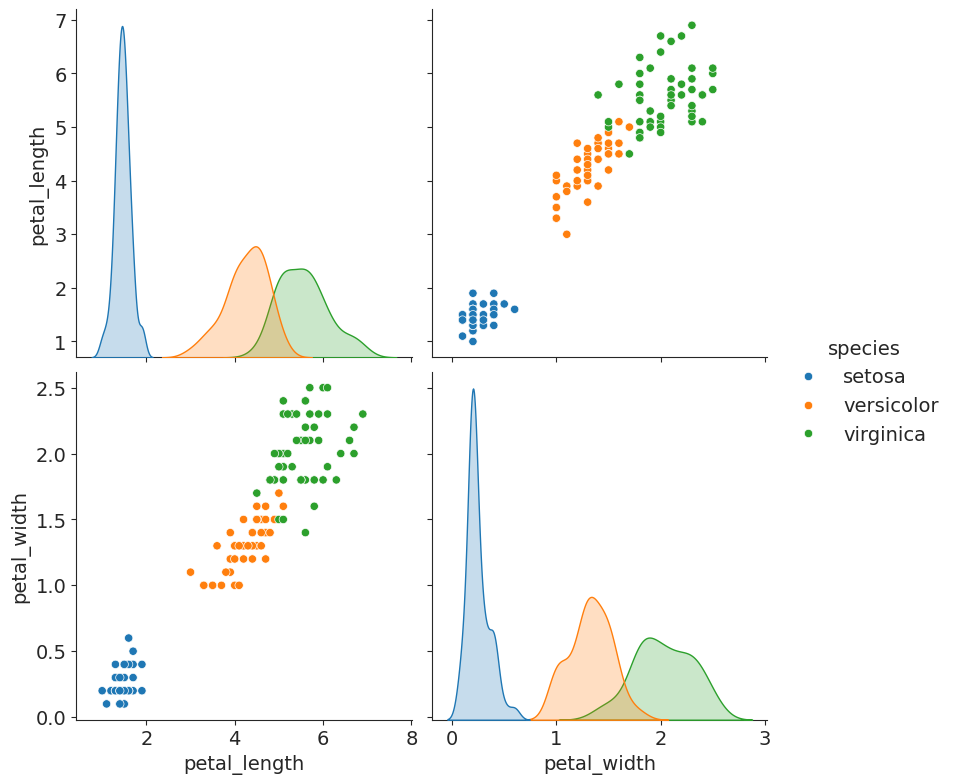

##Prepare (เตรียม) X,y

In [28]:
X = df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Label Encoding

In [29]:
y,class_names = pd.factorize(df.species)

class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

##Train-test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y)


In [31]:
X_train.shape , X_train.shape

((112, 4), (112, 4))

In [33]:
(label,count) = np.unique(y_test, return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[[ 0 11]
 [ 1 19]
 [ 2  8]]


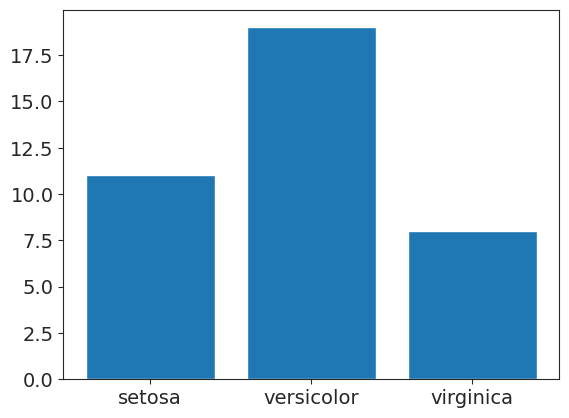

In [35]:
plt.bar(freq[:,0], freq[:,1])
plt.xticks(np.arange(3), class_names)  # Set text labels.
plt.show()

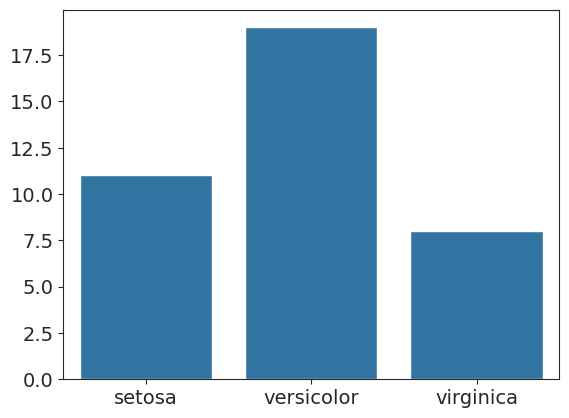

In [36]:
sns.barplot(x=freq[:,0], y=freq[:,1])
plt.xticks(np.arange(3), class_names)
plt.show()

In [37]:
X_train[:5]

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
25,5.0,3.0,1.6,0.2
131,7.9,3.8,6.4,2.0
5,5.4,3.9,1.7,0.4
121,5.6,2.8,4.9,2.0


In [38]:
y_train[:5]

array([0, 0, 2, 0, 2])

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
model.feature_importances_

array([0.0179963 , 0.01388286, 0.39433443, 0.57378641])

#Tree

In [45]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

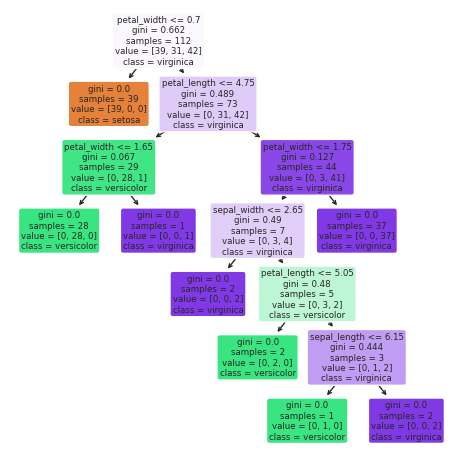

In [46]:
from sklearn.tree import plot_tree
data_feature_names = X.columns
plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=96)

plot_tree(model,
          filled=True,rounded=True,
          feature_names=data_feature_names,
          class_names=class_names)

plt.show()

##Evaluation

In [51]:
score = model.score(X_test, y_test)
print('Score =', score.round(3))

Score = 0.947


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score : {:.3f}'.format(model.score(X_test,y_test)))
print('Accuracy Score :',accuracy_score(y_test,y_pred).round(3))

print(classification_report(y_test,y_pred,target_names=class_names))

cm = confusion_matrix(y_test,y_pred)

print(cm)

Score : 0.947
Accuracy Score : 0.947
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.89      0.94        19
   virginica       0.80      1.00      0.89         8

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38

[[11  0  0]
 [ 0 17  2]
 [ 0  0  8]]


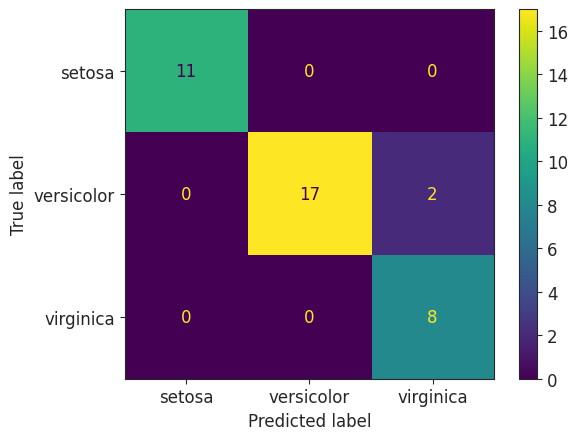

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})

ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
plt.show()

#Miss-classification

In [56]:
y_pred = model.predict(X_test)

In [57]:
dy = pd.DataFrame()

dy['y_test'] = y_test
dy['y_pred'] = y_pred

dy['result'] = y_test == y_pred

In [59]:
dy.head()

,y_test,y_pred,result
0,1,1,True
1,0,0,True
2,1,1,True
3,2,2,True
4,2,2,True


In [60]:
dy.groupby('result').count()

,y_test,y_pred
result,,
False,2,2
True,36,36


In [61]:
dy[dy.result == False]

,y_test,y_pred,result
25,1,2,False
30,1,2,False


In [62]:
print("Miss-classification:", len(y_test[(y_test != y_pred)]) )

Miss-classification: 2


##Predict

In [63]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     #
                  [6.1, 3.5, 3.9, 1.5],     #
                  [6.7, 3.5, 6.3, 1.4]])    #

y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

versicolor
versicolor
virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


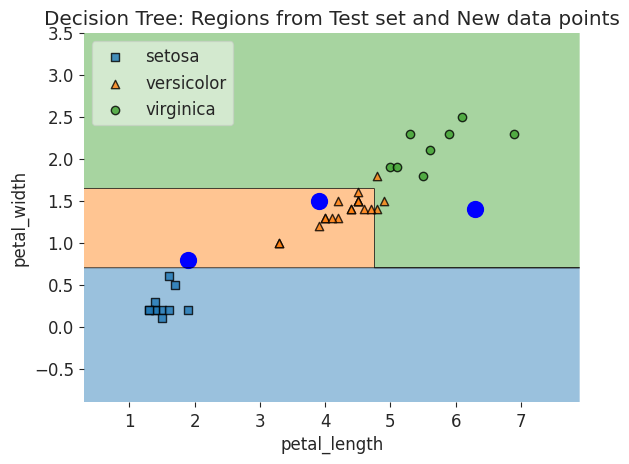

In [64]:
# จาก Test-set และ New data points (ที่ Predict)

from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model, feature_index=[2, 3],  # Petal Length-Width
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Regions from Test set and New data points')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

ValueError: Column(s) [3] need to be accounted for in either feature_index or filler_feature_values

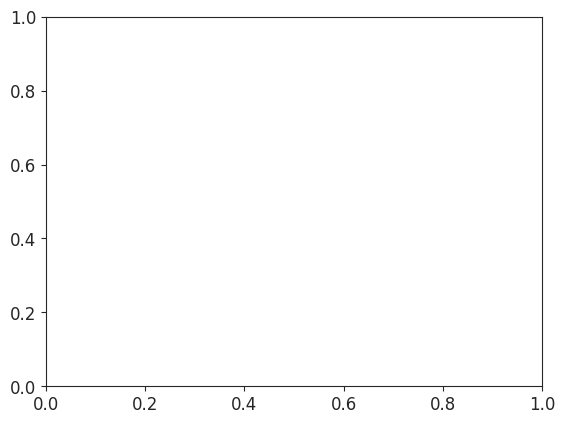